In [1]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Specify the model to be used
COCO and MPI are body pose estimation model. COCO has 18 points and MPI has 15 points as output.

In [2]:
MODE = "MPI"

if MODE is "COCO":
    protoFile = "pose/coco/pose_deploy_linevec.prototxt"
    weightsFile = "pose/coco/pose_iter_440000.caffemodel"
    nPoints = 18
    POSE_PAIRS = [ [1,0],[1,2],[1,5],[2,3],[3,4],[5,6],[6,7],[1,8],[8,9],[9,10],[1,11],[11,12],[12,13],[0,14],[0,15],[14,16],[15,17]]

elif MODE is "MPI" :
    protoFile = "pose/mpi/pose_deploy_linevec_faster_4_stages.prototxt"
    weightsFile = "pose/mpi/pose_iter_160000.caffemodel"
    nPoints = 15
    POSE_PAIRS = [[0,1], [1,2], [2,3], [3,4], [1,5], [5,6], [6,7], [1,14], [14,8], [8,9], [9,10], [14,11], [11,12], [12,13] ]
    

In [3]:
image1 = cv2.imread("A.jpg")
frameWidth = image1.shape[1]
frameHeight = image1.shape[0]
threshold = 0.1

In [4]:
# Load the network and pass the image through the network

net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

inWidth = 368
inHeight = 368
inpBlob = cv2.dnn.blobFromImage(image1, 1.0 / 255, (inWidth, inHeight),
                          (0, 0, 0), swapRB=False, crop=False)

net.setInput(inpBlob)
output = net.forward()
H = output.shape[2]
W = output.shape[3]
print(output.shape)

(1, 44, 46, 46)


(-0.5, 746.5, 1327.5, -0.5)

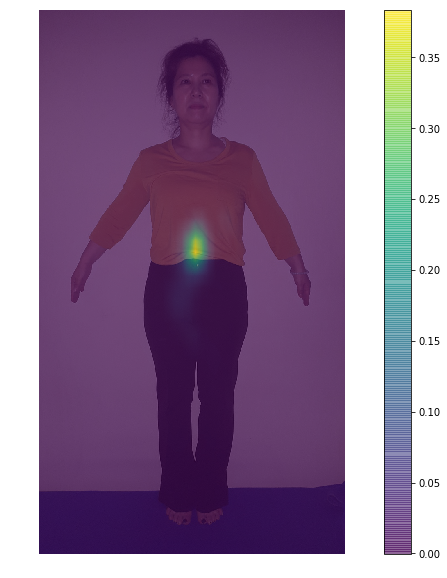

In [5]:
# Slice a probability map from the output

i = 14  # body keypoint
probMap = output[0, i, :, :]
probMap = cv2.resize(probMap, (image1.shape[1], image1.shape[0]))
plt.figure(figsize=[14,10])
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.imshow(probMap, alpha=0.6)
plt.colorbar()
plt.axis("off")

(-0.5, 746.5, 1327.5, -0.5)

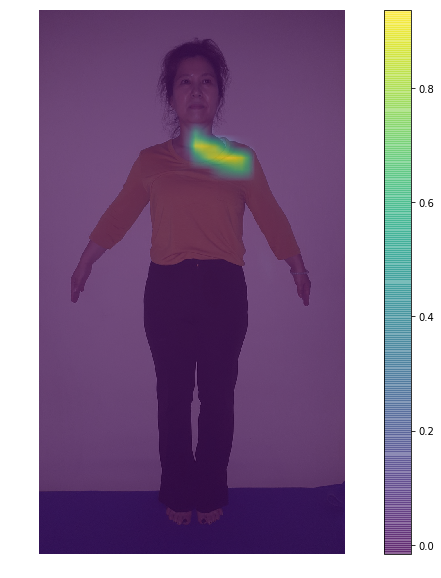

In [6]:
# affinity map on the image

i = 24
probMap = output[0, i, :, :]
probMap = cv2.resize(probMap, (image1.shape[1], image1.shape[0]))
plt.figure(figsize=[14,10])
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.imshow(probMap, alpha=0.6)
plt.colorbar()
plt.axis("off")

# Sample Single Image

In [23]:
frame = cv2.imread("A1.jpg")
frameCopy = np.copy(frame)
frameWidth = frame.shape[1]
frameHeight = frame.shape[0]
threshold = 0.1

In [24]:
inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight),
                          (0, 0, 0), swapRB=False, crop=False)

net.setInput(inpBlob)

output = net.forward()
H = output.shape[2]
W = output.shape[3]

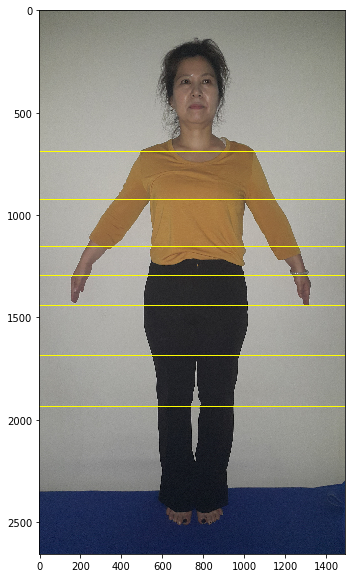

In [25]:
# detected keypoints
points = []
shoulder_l = []
shoulder_r = []
hip_l = []
hip_r = []
knee_r = []
knee_l = []

for i in range(nPoints):
    # confidence map of corresponding body's part.
    probMap = output[0, i, :, :]

    # Find global maxima of the probMap.
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)
    
    # Scale the point to fit on the original image
    x = (frameWidth * point[0]) / W
    y = (frameHeight * point[1]) / H

    if prob > threshold : 
        
        if i==2:
            shoulder_l.append((int(x), int(y)))
                
        if i==8:
            hip_l.append((int(x), int(y)))
                
        if i==5:
            shoulder_r.append((int(x), int(y)))
                
        if i==11:
            hip_r.append((int(x), int(y)))
            
        if i==9:
            knee_l.append((int(x), int(y)))
                
        if i==12:
            knee_r.append((int(x), int(y)))
                
        if i==14:
            cv2.line(frame, (0, int(y)), (2000, int(y)), (0, 255, 255), 3)
            
            real_knee = (knee_r[0][1] + knee_l[0][1])/2
            real_hip = (hip_r[0][1] + hip_l[0][1])/2
            real_shoulder = (shoulder_r[0][1] + shoulder_l[0][1])/2
            waist = (y + real_hip) / 2
            chest = (y + real_shoulder) / 2
            thigh = (real_hip + real_knee) /2
            
            cv2.line(frame, (0, int(real_hip)), (2000, int(real_hip)), (0, 255, 255), 3)
            cv2.line(frame, (0, int(real_knee)), (2000, int(real_knee)), (0, 255, 255), 3)
            cv2.line(frame, (0, int(real_shoulder)), (2000, int(real_shoulder)), (0, 255, 255), 3)
            cv2.line(frame, (0, int(waist)), (2000, int(waist)), (0, 255, 255), 3)
            cv2.line(frame, (0, int(chest)), (2000, int(chest)), (0, 255, 255), 3)
            cv2.line(frame, (0, int(thigh)), (2000, int(thigh)), (0, 255, 255), 3)

        points.append((int(x), int(y)))
    else :
        points.append(None)

plt.figure(figsize=[10,10])
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [10]:
points

[(747, 173),
 (747, 635),
 (519, 692),
 (357, 981),
 (227, 1212),
 (974, 692),
 (1136, 1039),
 (1266, 1270),
 (552, 1501),
 (649, 1963),
 None,
 (909, 1385),
 (714, 1905),
 None,
 (747, 1154)]